In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv('titanic_data.csv')                # for reading data we use read_csv 
df.head()                                         # head() is used for see top(5) rows from dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
df.drop_duplicates(inplace=True)              #drop dulplicate so we use pandas attribute drop_duplicate for deleting duplicates
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.isnull().sum()       # isnull checks missing values 
                        #so we have null values in age,cabin,embarked colums so we have fill it first 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
#fill all null values from Age colums as mean values of Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)   

In [58]:
#fill all null values from cabin colums
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [59]:
#fill all null values from Embarked column
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [60]:
df.isnull().sum()    # we fill all null values so there is no missing values in current dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [62]:
l1=df[df['Age']<35]

In [63]:
names=l1['Name'].tolist()

In [65]:
df.iloc[10:25,3:5]

,Name,Sex
10,"Sandstrom, Miss. Marguerite Rut",female
11,"Bonnell, Miss. Elizabeth",female
12,"Saundercock, Mr. William Henry",male
13,"Andersson, Mr. Anders Johan",male
14,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,"Hewlett, Mrs. (Mary D Kingcome)",female
16,"Rice, Master. Eugene",male
17,"Williams, Mr. Charles Eugene",male
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female
19,"Masselmani, Mrs. Fatima",female


In [66]:
agg=df.groupby('Pclass').agg({'Age':'sum','Fare':'sum'})
agg

,Age,Fare
Pclass,,
1,8002.393529,18177.4125
2,5495.520294,3801.8417
3,12964.000000,6714.6951


In [67]:
mean_price=df.groupby(['Sex','Pclass'])['Fare'].mean()
mean_price

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [68]:
#total count of passengers by gender
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

So we can see here there are 577 male passenger and 314 female passenger are present in the ship

In [69]:
#Total count of passengers by cabin wise
df['Cabin'].value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

So we can see here passengers by cabin wise most of the passengers are present in the cabin B96 and B98

In [70]:
#how much fare by cabin wise
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

we can see avrage fare of class 1 is 84 and class 2 is 20 and class 3 is 13

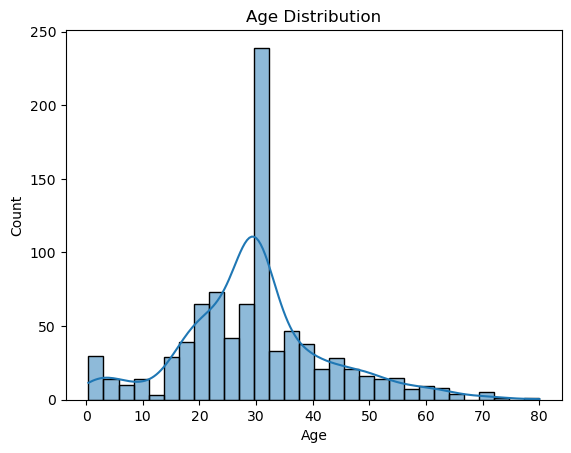

In [71]:
#univariate analysis using suitable plots
# Age Distribution
sns.histplot(data=df,x='Age',kde=True)
plt.title('Age Distribution')
plt.show()

Most of passanger age is between 20 to 40 years

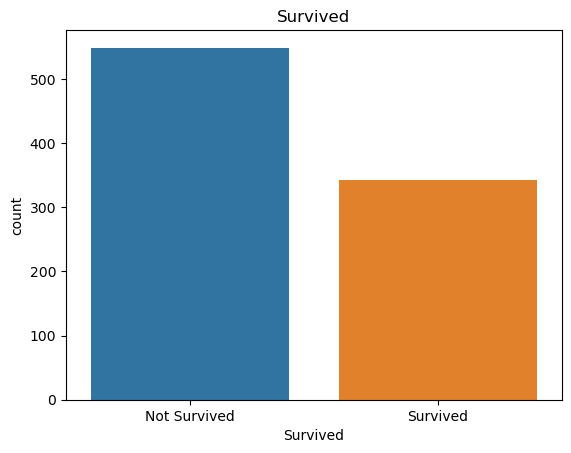

In [72]:
#survival distribution
sns.countplot(data=df,x='Survived')
plt.xticks(ticks=[0,1],labels=['Not Survived','Survived'])
plt.title('Survived')
plt.show()

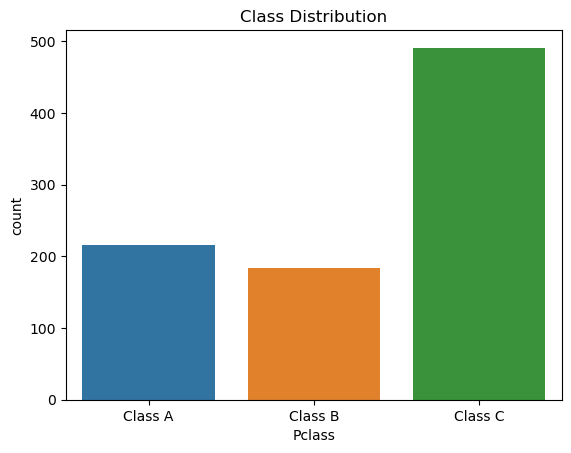

In [73]:
#passanger distribution by class

sns.countplot(data=df,x='Pclass')
plt.xticks(ticks=[0,1,2],labels=['Class A','Class B','Class C'])
plt.title('Class Distribution')
plt.show()


Most passangers are present in Class C

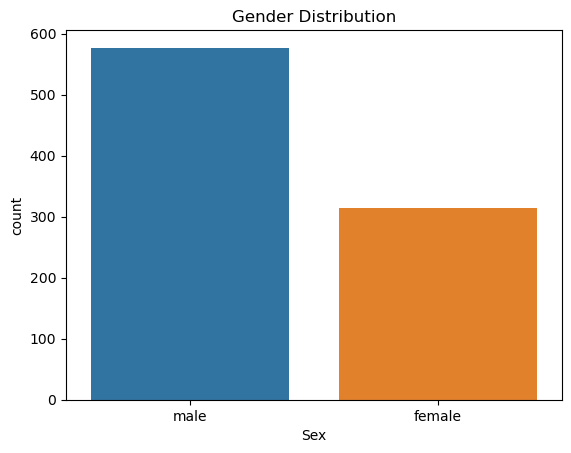

In [75]:
sns.countplot(data=df,x='Sex')
plt.title('Gender Distribution')
plt.show()

Most of the passsnger is Male 

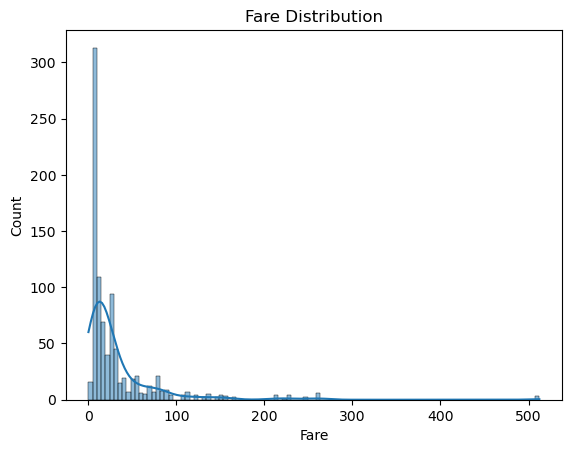

In [76]:
#fare distribution
sns.histplot(data=df,x='Fare',kde=True)
plt.title('Fare Distribution')
plt.show()

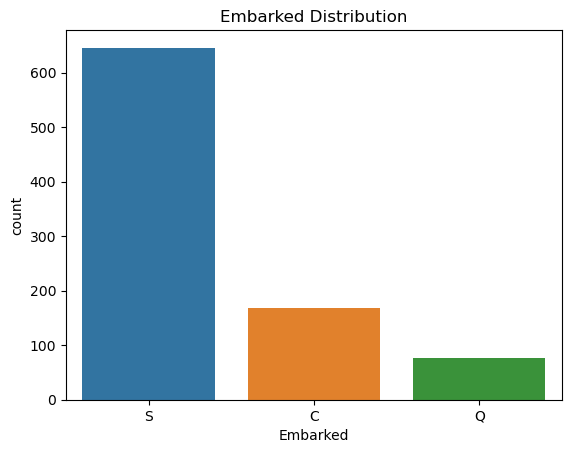

In [77]:
#embarked Distribution
sns.countplot(data=df,x='Embarked')
plt.title('Embarked Distribution')
plt.show()

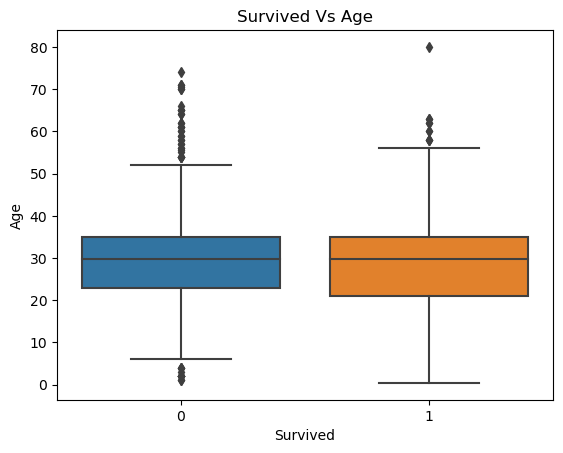

In [79]:
# bi-variate analysis using suitable plots
#Survived Vs Age
sns.boxplot(data=df,x='Survived',y='Age')
plt.title('Survived Vs Age')
plt.show()

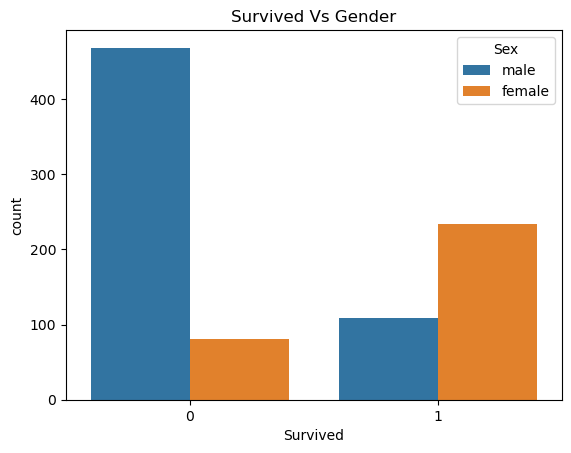

In [80]:
#Survived Vs sex
sns.countplot(data=df,x='Survived',hue='Sex')
plt.title('Survived Vs Gender')
plt.show()

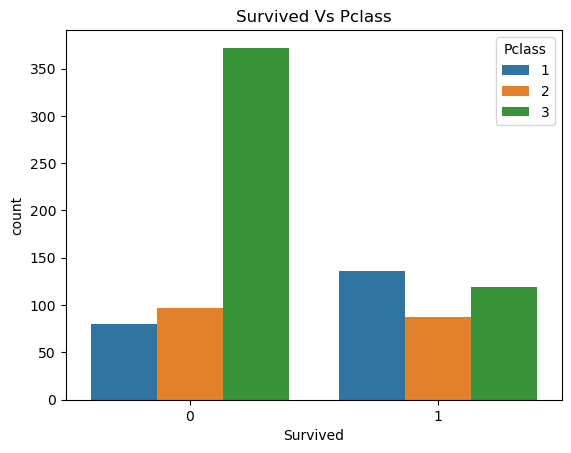

In [81]:
#Survived Vs Pclass
sns.countplot(data=df,x='Survived',hue='Pclass')
plt.title('Survived Vs Pclass')
plt.show()

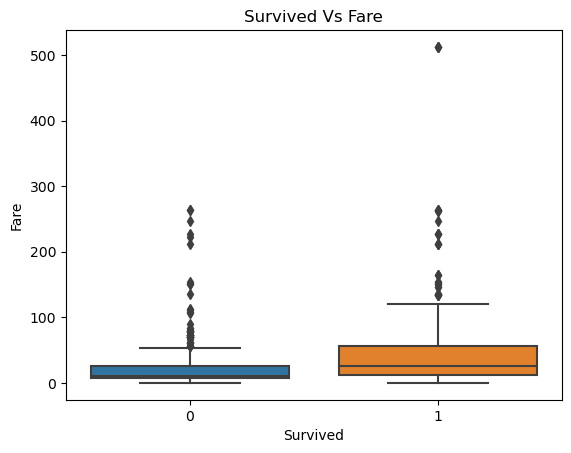

In [82]:
#Survived vs Fare

sns.boxplot(data=df,x='Survived',y='Fare')
plt.title('Survived Vs Fare')
plt.show()

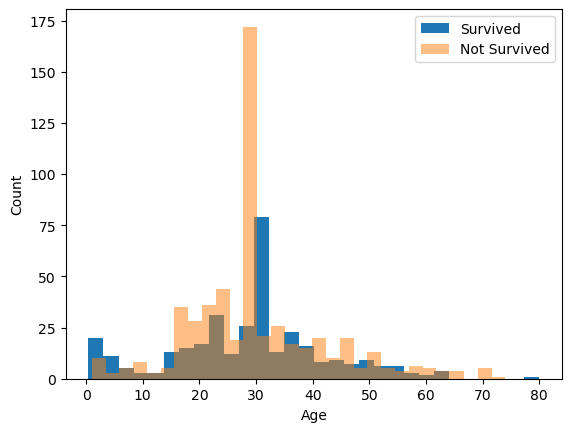

In [83]:
# survived and not survived by age wise
survived=df[df['Survived']==1]['Age']
not_survived=df[df['Survived']==0]['Age']
plt.hist(survived,bins=30,label='Survived')
plt.hist(not_survived,alpha=0.5,bins=30,label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

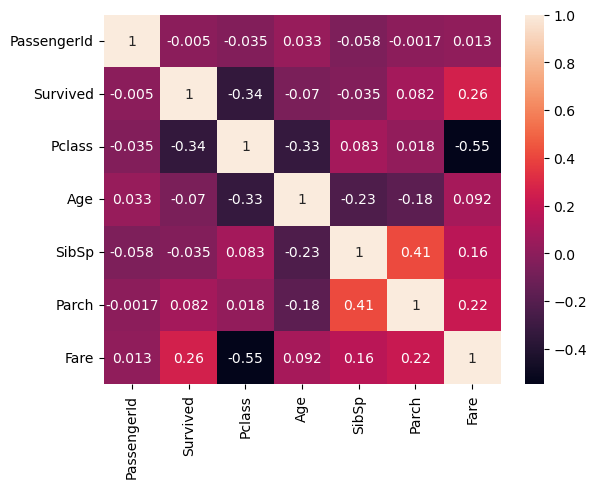

In [84]:
#Heatmap of corr. matrix
sns.heatmap(df.corr(),annot=True)
plt.show()

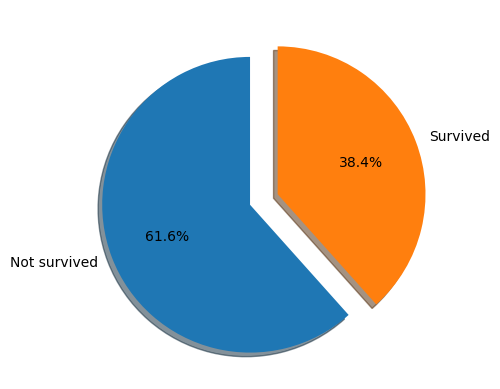

In [85]:
survival_count=df['Survived'].value_counts()
plt.pie(survival_count,labels=['Not survived','Survived'],autopct='%1.1f%%',explode=[0.2,0],startangle=90,shadow=True)
plt.show()

61.6% passangers are not survived 
38.4% passangers are survived

In [87]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']
df=df[features].copy()

In [88]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [90]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [92]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_pred = model.predict(x_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877
